#Credit Card Default Prediction


#MIT License

Copyright (c) 2023 Kodand Ram Movva

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#About Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.The dataset is widely used for studying credit risk and default prediction. Many researchers and practitioners have used this dataset to develop credit scoring models, which are used by banks and other financial institutions to assess the creditworthiness of their customers and to predict their likelihood of defaulting on their loans.

##Dataset Content

The data set contains 25 different features, including demographic information such as gender, education, and marital status, as well as credit card-related features such as credit limit, payment history, and bill amount.

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

###Source
Data source from kaggle: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

Original Data Source: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients





# Import packages and modules


In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
!pip install scikit-plot



from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read file into dataframe and print out dataframe shape

read_csv() method from Pandas library to read the CSV file located at the URL "https://raw.githubusercontent.com/KodandRam/Credit_Card_Default_Prediction/main/UCI_Credit_Card.csv".

Shape attribute of the resulting dataframe to obtain a tuple that contains the number of rows and columns in the dataframe. The resulting tuple indicates that the dataframe has 30,000 rows and 25 columns.





In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/KodandRam/Credit_Card_Default_Prediction/main/UCI_Credit_Card.csv")
df.shape

(30000, 25)

In [ ]:
df.head(10)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#Exploratory Data Analysis

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.loc[0]

ID                                1.0
LIMIT_BAL                     20000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          1.0
AGE                              24.0
PAY_0                             2.0
PAY_2                             2.0
PAY_3                            -1.0
PAY_4                            -1.0
PAY_5                            -2.0
PAY_6                            -2.0
BILL_AMT1                      3913.0
BILL_AMT2                      3102.0
BILL_AMT3                       689.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                        689.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        1.0
Name: 0, dtype: float64

*    Understand the data by printing out all column names
*    Understand the data by printing out first row




In [ ]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

*   0-not default
*   1-default
*   About 22% customers had default payment next month


In [ ]:
# Check column names, columan data type and indentify any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300



*   Checking for if any Missing values and as you can see they are no missing values



In [ ]:

df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

*  Change inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NMO'



In [ ]:
num_duplicates = df['ID'].duplicated().sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate IDs")
else:
    print("No duplicate IDs found")


No duplicate IDs found


* Checking for duplicate 'ID' in data if there are any

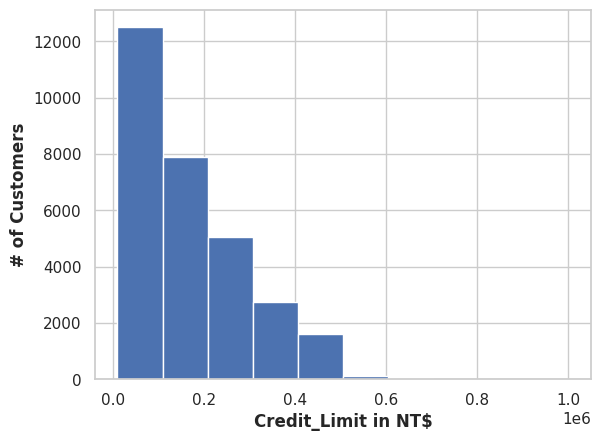

In [ ]:
plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

* Use histogram to view the distribution of credit limit


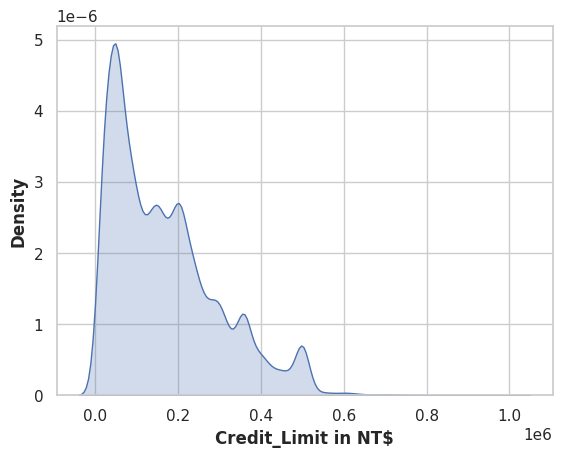

In [ ]:
import seaborn as sns

sns.kdeplot(df["LIMIT_BAL"], fill=True)
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.show()



 * It will show the distribution of credit limits in NT$ across the dataset

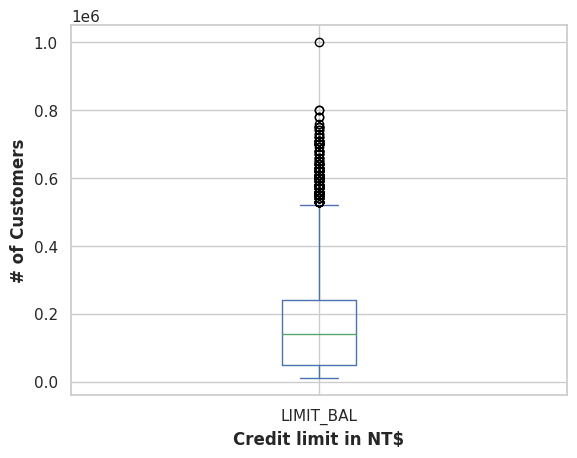

In [ ]:
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

* If you take a close look at the outlier, the observations from other columns indicate that this was just a customer who has an excellent payment history

* Therefore it should be considered as a valid data

In [ ]:
outlier = df.loc[df['LIMIT_BAL']>990000]
outlier

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The describe() function is used to generate descriptive statistics of the dataset. It returns a summary of the central tendency, dispersion, and shape of the distribution of a dataset.

In [ ]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

* Get SEX column's distribution.
 1. male
 2. female


In [ ]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

* Get EDUCATION column's distribution.
  0. others
 1. graduate school 
 2. university
  3. high school
  4. others
  5. unknown
  6. unknown

In [ ]:
# Get the total counts of each EDUCATION level

df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

*  Getting count of each column

In [ ]:
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

* Change values 4, 5, 6 to 0 and define 0 as 'others' as all are others

In [ ]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["MARRIAGE"].unique()

array([1, 2, 3, 0])

* Getting Marriage Column Distribution
1. married 
2. single
3. others
0. others

In [ ]:

df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [ ]:

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

* Combine 0 and 3 by changing the value 0 into 3


In [ ]:
# Set ID as dataframe index

df.set_index('ID', inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


* This code sets the index of the DataFrame df to the column 'ID' and modifies the DataFrame in place to reflect this change. The inplace parameter is set to True, so the original DataFrame is modified and nothing is returned.

In [ ]:
def create_bar(column_name):
    # Calculate percentage of default by each group
    grouped_data = df.groupby([column_name, 'DEFAULT'])['DEFAULT'].count().unstack()
    default_percentages = grouped_data.apply(lambda x: x/x.sum(), axis=1)
    
    # Plot stacked bar chart
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    ax = default_percentages.plot(kind='bar', stacked=True, figsize=(10,5))
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel(xlabel, fontweight="bold")
    ax.set_ylabel(ylabel, fontweight="bold")
    ax.legend(["No Default", "Default"])
    
    # Add percentage labels to each bar
    for container in ax.containers:
        ax.bar_label(container, labels=[f"{val:.0%}" for val in container.datavalues])
    
    plt.xticks(rotation=45, ha="right")
    plt.show()


**This function create_bar() creates a stacked bar chart to visualize the percentage of defaults and non-defaults for different categories of a given column in the dataset. It takes the column name as an argument and groups the data by the column and the DEFAULT column to calculate the percentage of default by each group. It then plots a stacked bar chart where each category of the column is represented by a bar and the height of each bar is divided into the percentage of default and non-default.**

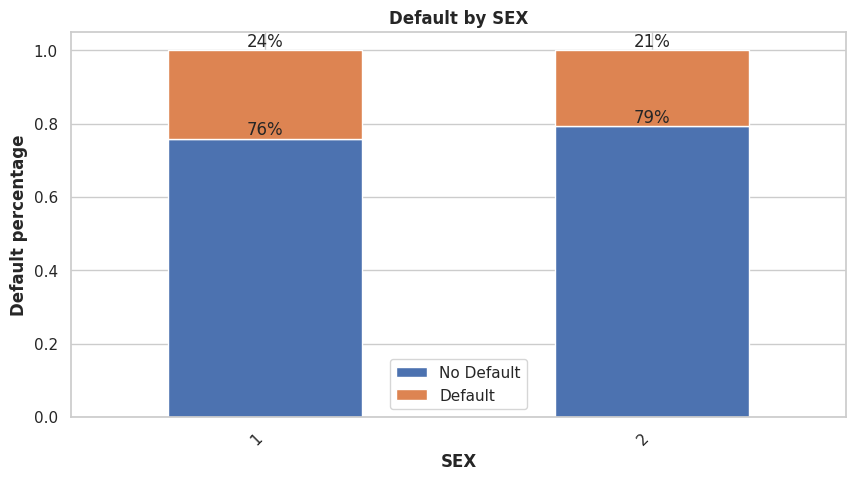

In [ ]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_bar('SEX')

The data indicates 30% male have default payment while 26% female have default payment, the difference is not significant.


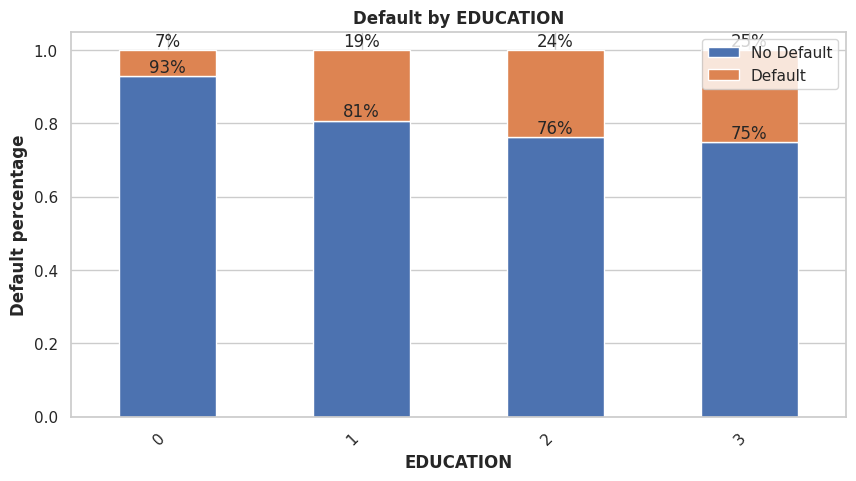

In [ ]:
# Plot a stacked bar chart to show default by education level

create_bar('EDUCATION')

*The data indicates customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education did.*

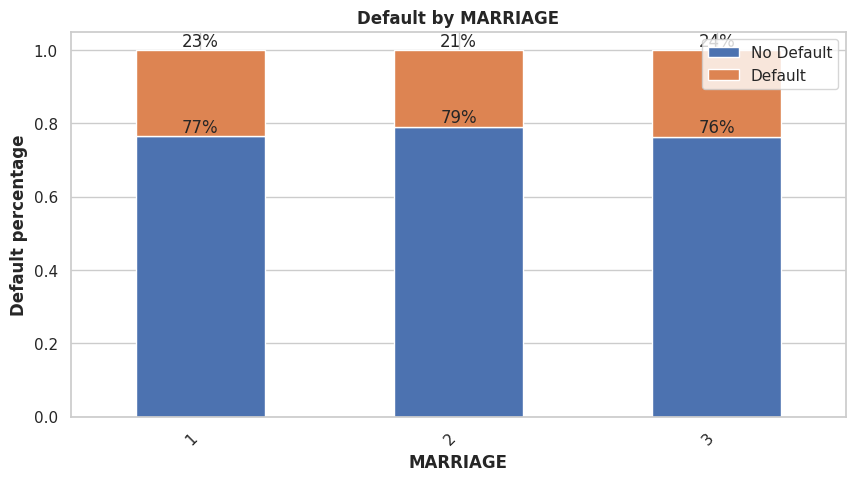

In [ ]:
# Plot a stacked bar chart to visualize default and non-default distribution by marital status 

create_bar('MARRIAGE')

There is no difference of default risk in terms of marital status.



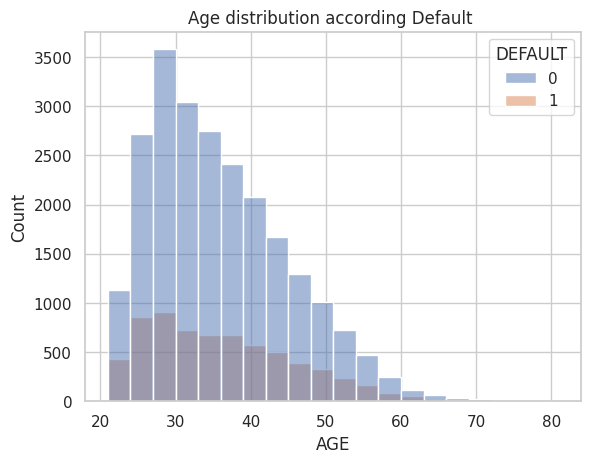

In [ ]:
sns.histplot(data=df, x="AGE", hue="DEFAULT", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

* Histogram is right-skewed meaning the older customers are less likely to use credit cards
* The main client is in their 30s
* Customers in their 30s are also the most prone to credit fraud

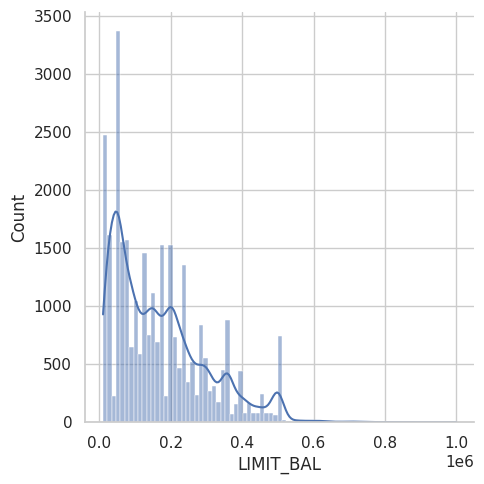

In [ ]:
sns.displot(df.LIMIT_BAL, kde=True)

* This will display a distribution plot for the 'LIMIT_BAL' column in the DataFrame, with a histogram showing the frequency of values and a curve showing the estimated probability density function. The kde=True parameter specifies to include the kernel density estimate curve in the plot

<Axes: >

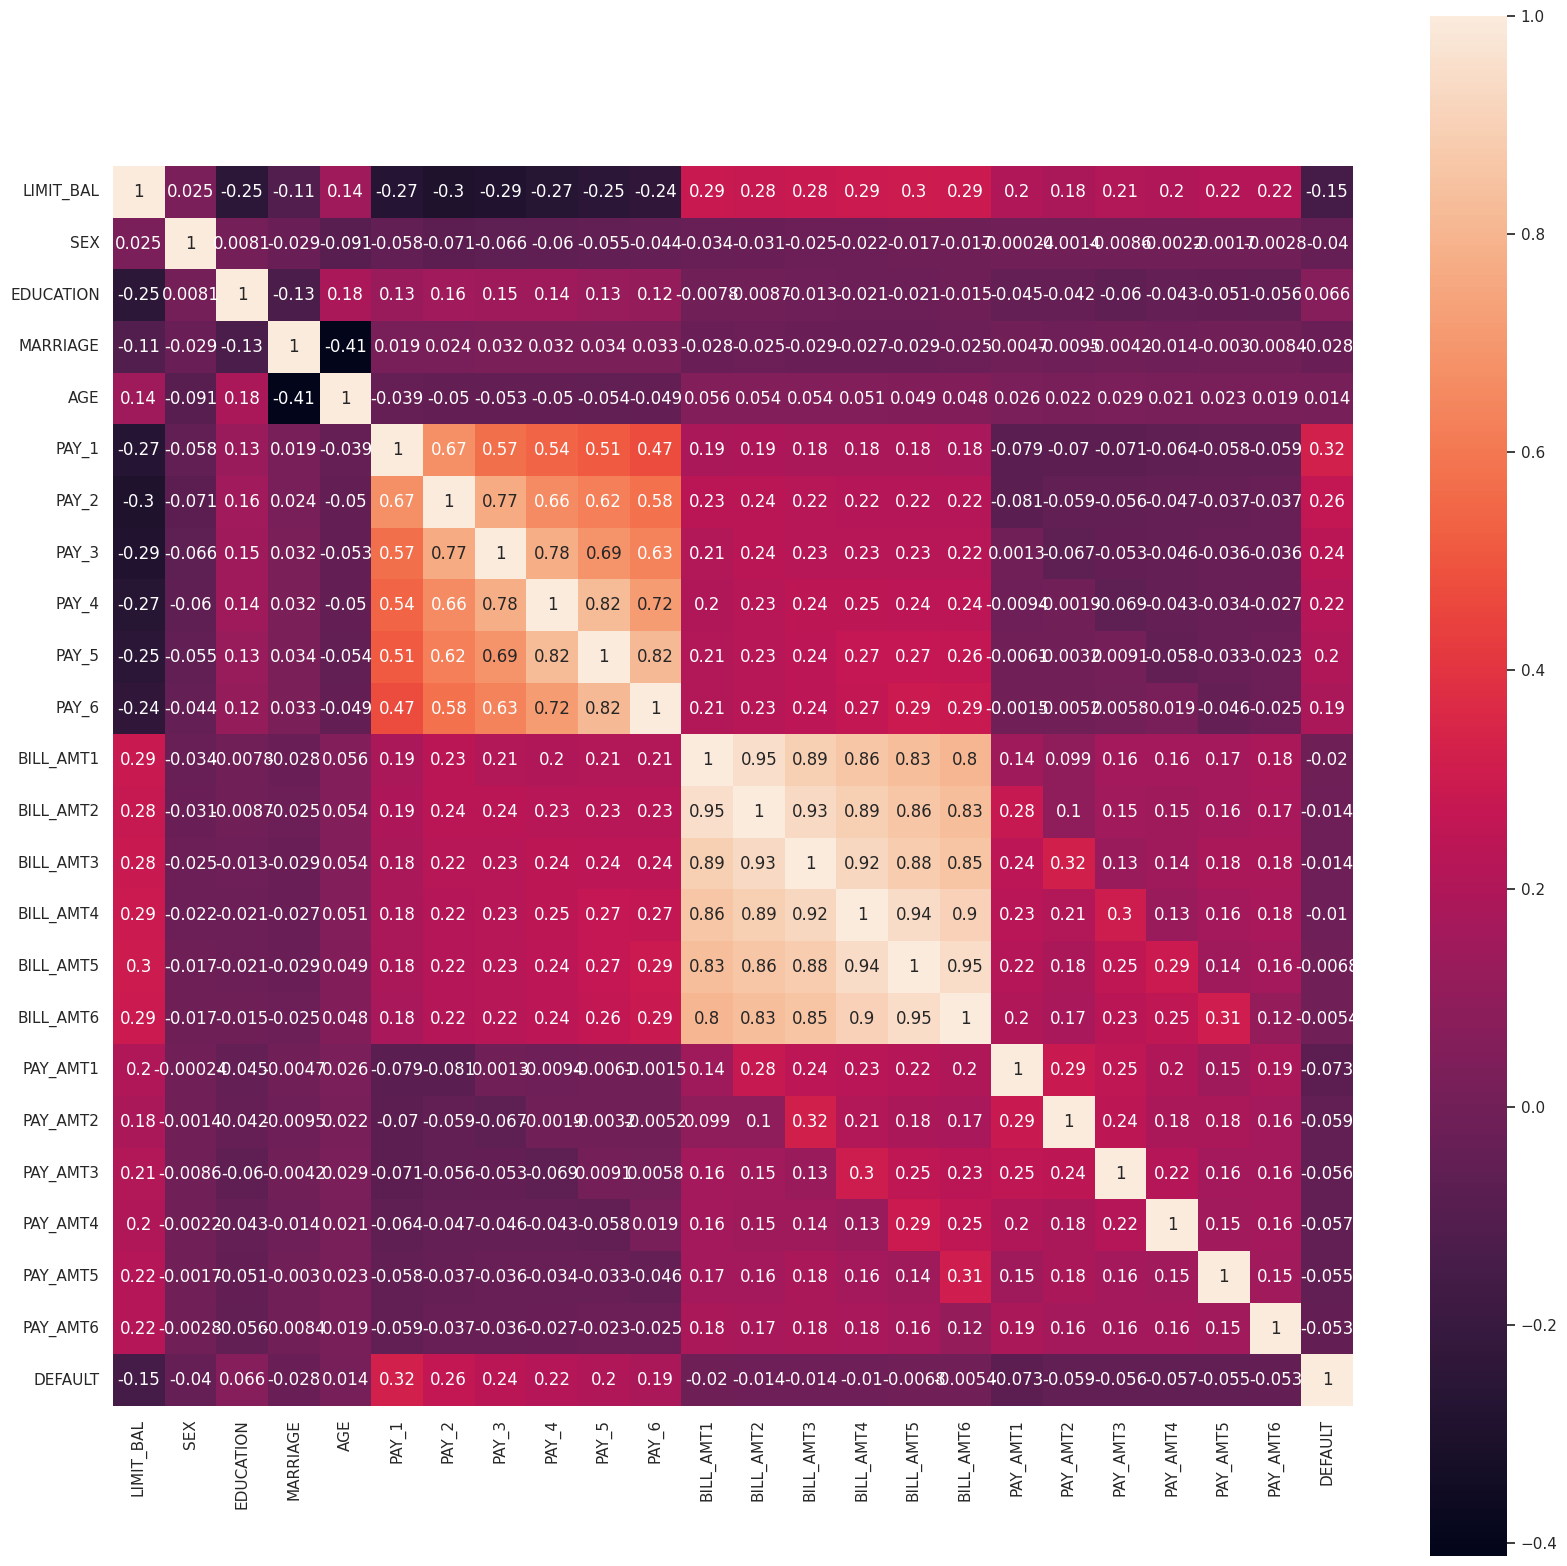

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

**Above code generates correlation matrix**

A correlation matrix is a matrix that shows the correlation coefficients between a set of variables. Each row and column represents a variable, and the value in each cell represents the correlation coefficient between the corresponding row and column variables.


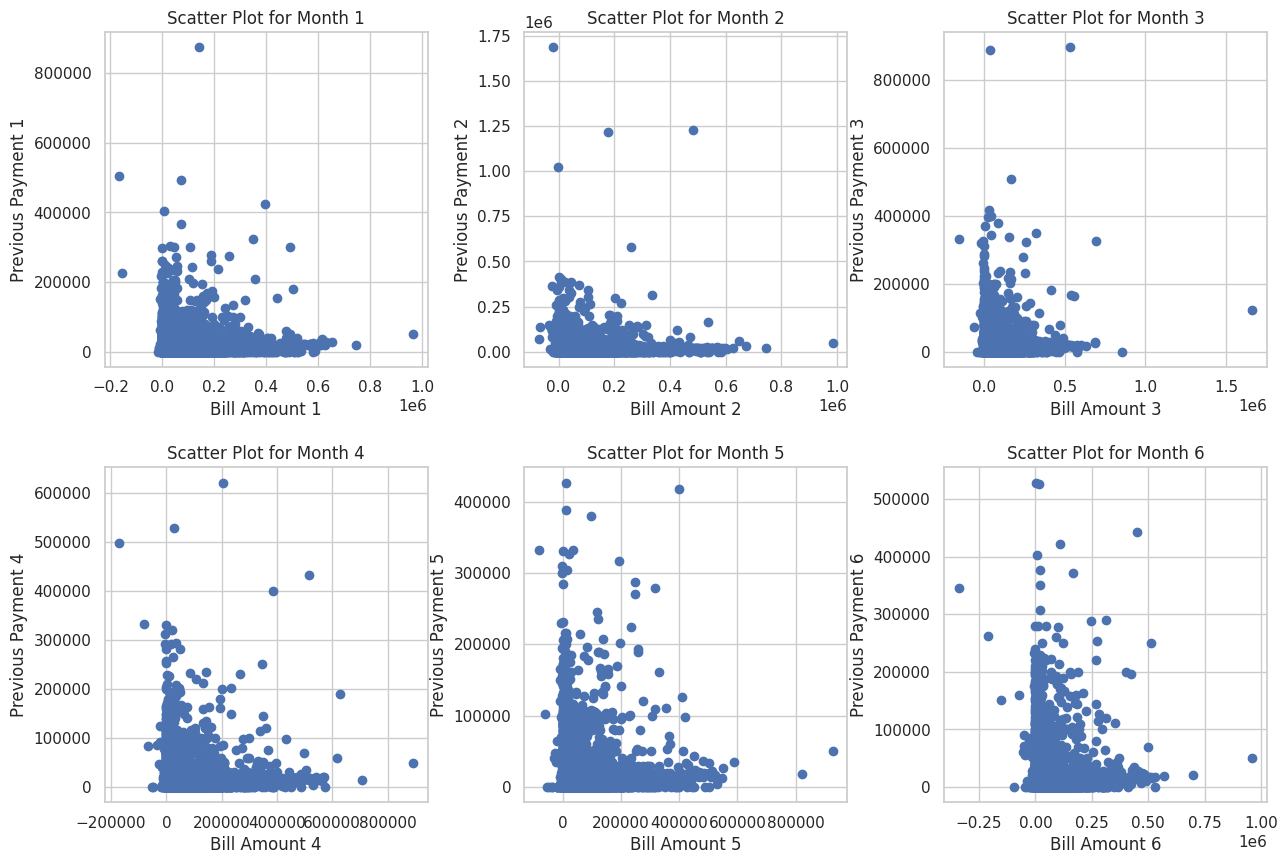

In [ ]:
# Create a scatter plot for each month
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(6):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(df[f'BILL_AMT{i+1}'], df[f'PAY_AMT{i+1}'])
    axs[row, col].set_xlabel(f'Bill Amount {i+1}')
    axs[row, col].set_ylabel(f'Previous Payment {i+1}')
    axs[row, col].set_title(f'Scatter Plot for Month {i+1}')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


**Scatter Plot**

A scatter plot is a type of plot that is commonly used to display the relationship between two continuous variables. It allows us to see how one variable is affected by the other, and to visualize the degree of correlation between them. Scatter plots can help us identify patterns or trends in data, and can also reveal outliers or other anomalies. They are useful for exploratory data analysis and can help us make informed decisions about how to model the data.







In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [ ]:
data=df

In [ ]:
# Define predictor variables and target variable
X = data.drop(columns=['DEFAULT'])
y = data['DEFAULT']

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist()   

Here, we are defining the predictor variables and target variable for our analysis. We are assigning the feature columns to X and the target column DEFAULT to y. We also extract the numerical columns from X and save them in X_num. This will help us in rescaling these columns later on. Finally, we save the numerical column names in num_cols.

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64


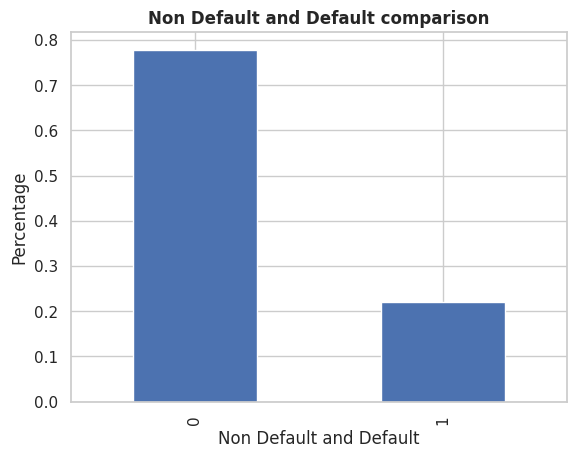

In [ ]:
# Check target classes balancec
cla_bal = data['DEFAULT'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Non Default and Default comparison',fontweight = "bold")
plt.xlabel('Non Default and Default')
plt.ylabel('Percentage')
plt.show()

This code is checking the balance of classes in the target variable 'DEFAULT'. It prints the percentage of each class and then plots it as a bar chart and from graph you can see it is unbalanced

##Scaling Data

In [ ]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

StandardScaler is a preprocessing step in machine learning to standardize the data before fitting it into a machine learning algorithm. It transforms the data so that it has a mean of 0 and a standard deviation of 1. This is useful for algorithms that rely on the assumption of a normal distribution, such as linear regression, logistic regression, and support vector machines.

#Splitting Data

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

This code snippet is splitting the dataset into training and testing sets using 70% of the data for training and 30% for testing. The random_state parameter is set to 42, which means that the same random split will be used every time the code is run, ensuring reproducibility.



#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution

print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()


X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 16324, 1: 4676})
After oversampling:  Counter({1: 16324, 0: 16324})


This code uses the SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the imblearn library to oversample the minority class in the training data.

The result is that the minority class is oversampled to match the majority class, so that both classes are represented equally in the training data. This can help to improve the performance of models on imbalanced datasets.

#Models

##Logistic Regression

Logistic Regression is a classification algorithm that is used to model the probability of a binary target variable (i.e., 0 or 1). It is a type of generalized linear model that uses a logistic function to model the relationship between the predictor variables and the probability of the target variable.

In [ ]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

pred_logit= logit.predict(X_test)

print("Logit model's accuracy:", accuracy_score(y_test, pred_logit))

print(classification_report(y_test, pred_logit))



Logit model's accuracy: 0.6844444444444444
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.37      0.65      0.47      1960

    accuracy                           0.68      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.77      0.68      0.71      9000



##Decision Tree Classifier

Decision Tree Classifier is a type of supervised machine learning algorithm used for both classification and regression problems. It creates a tree-like model of decisions and their possible consequences based on a set of input features. Each internal node of the tree represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value to predict.

In [ ]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
print('Decision Tree Accuracy :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))


Decision Tree Accuracy : 0.7772222222222223
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7040
           1       0.49      0.50      0.49      1960

    accuracy                           0.78      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.78      0.78      0.78      9000



##Random Forest

Random Forest is a supervised learning algorithm that can be used for classification and regression tasks. It is an ensemble learning method that creates multiple decision trees and combines their outputs to make the final prediction.

In Random Forest, each decision tree is constructed based on a random subset of the training data and a random subset of the features. This helps to reduce the problem of overfitting that is often associated with single decision trees.

In [ ]:
rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))

Random Forest Accuracy is: 0.794
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7040
           1       0.53      0.47      0.50      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.68      0.69      9000
weighted avg       0.79      0.79      0.79      9000



##XGBoost

XGBoost (Extreme Gradient Boosting) is an ensemble machine learning algorithm that uses a gradient boosting framework. It is based on the gradient boosting decision tree (GBDT) algorithm and adds a few improvements, such as parallel processing, tree pruning, and regularization, to increase its speed and accuracy.



In [ ]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))

XGBoost Accuracy: 0.802
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7040
           1       0.57      0.39      0.46      1960

    accuracy                           0.80      9000
   macro avg       0.70      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000



In [ ]:
# Instantiate models with initial best guess parameters

params = { 
    'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}

In [ ]:
# Instantiate model
clf_xgb = XGBClassifier(**params)

In [ ]:
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)


Uses cross-validation to evaluate the performance of the XGBoost classifier (clf_xgb) on the training data. Specifically, it calculates the area under the receiver operating characteristic curve (ROC AUC) as the evaluation metric, using 5-fold cross-validation 

In [ ]:
print(np.mean(scores))

0.645430055610063


###Tune Parameters of XGBoost

In [ ]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }

This is a random grid created for hyperparameter tuning of the XGBoost classifier.

Hyperparameters are the parameters of a machine learning algorithm that are not learned from data during training. Instead, they are set before training, and they control aspects of the learning process. Tuning hyperparameters involves selecting the best combination of hyperparameters that results in the highest performance of the model.

In this case, the random grid is used to generate a range of values for different hyperparameters of the XGBoost classifier, which will be used to search for the optimal hyperparameters through a randomized search process. The hyperparameters included in the random grid are:

* n_estimators: the number of trees in the forest.
* gamma: the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
* learning_rate: the shrinkage applied to the weights update. The smaller the value, the slower the learning.
* max_depth: the maximum depth of the tree.
* subsample: the subsample ratio of the training instances.
* colsample_bytree: the subsample ratio of columns when constructing each tree.
* scale_pos_weight: the control the balance of positive and negative weights.

In [ ]:
random_search=RandomizedSearchCV(xgboost,
                                 param_distributions=random_grid_xgb,
                                 n_iter=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': array([200, 400, 600, 800]),
                                        'scale_pos_weight': [1, 3.5],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   scoring='roc_auc', verbose=3)

Here's a brief explanation of what's happening in this code:

We create an instance of RandomizedSearchCV and pass several arguments to it. This function allows us to search for the best hyperparameters for our model.
xgboost is the estimator we want to use.

param_distributions is the parameter space to search over. It's a dictionary of hyperparameters and the range of values to try for each hyperparameter.
n_iter is the number of iterations to perform.

scoring is the scoring metric to use. In this case, we use roc_auc.

n_jobs is the number of CPU cores to use.

cv is the number of cross-validation folds.

verbose controls the amount of output the function produces.

Finally, we fit the randomized search to our training data (X_train and y_train)
.
The best hyperparameters found during the search are stored in the best_params_ attribute of the randomized search object.

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#  best param
random_search.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 1,
 'n_estimators': 600,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

The output will give you the best hyperparameters found among the 5 randomly sampled combinations of hyperparameters.

In [ ]:
classifier=XGBClassifier(objective='binary:logistic',
                                  subsample=0.3,
                                 max_depth=3,
                                 learning_rate=0.25,
                                 gamma=0.1,
                                  n_estimators=500,
                                  scale_pos_weight=1,
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

XGBoost model is now fitted on the training set. You can proceed with making predictions on the test set and evaluating the model's performance using various metrics.

In [ ]:
hyper_pred= classifier.predict(X_test)

print("The accuracy of the model is:", accuracy_score(y_test, hyper_pred))

The accuracy of the model is: 0.8005555555555556


#Confusion Matrix

Confusion matrix is a table that is often used to evaluate the performance of a classifier. It shows the count of true positive, false positive, true negative, and false negative predictions made by the model. 

###Logistic Regression

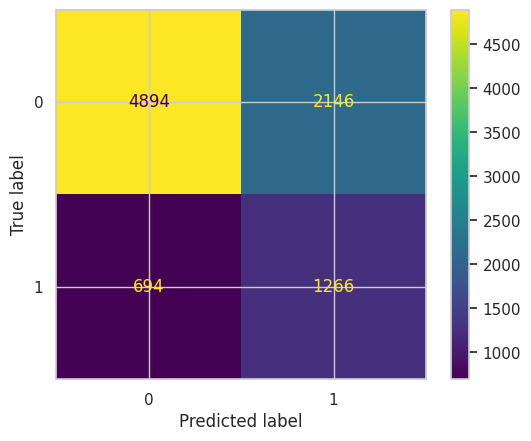

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, pred_logit)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


###Decision Tree

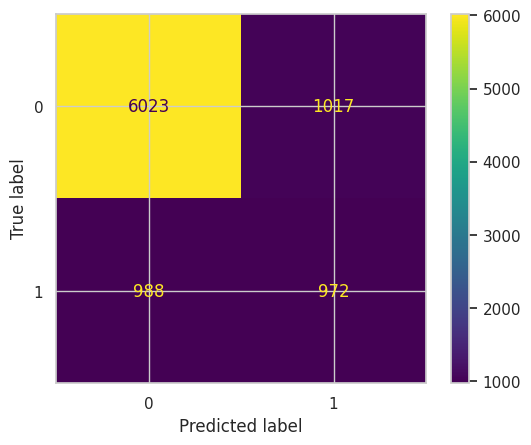

In [ ]:
conf_mat = confusion_matrix(y_test, pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


###Random Forest

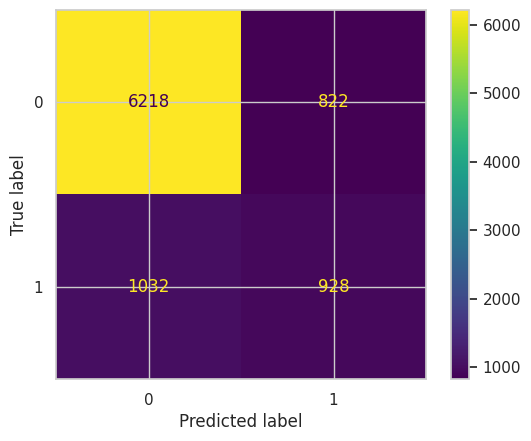

In [ ]:
conf_mat = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


###XGBoost

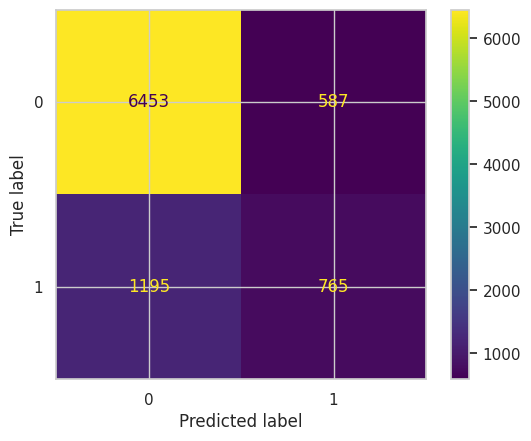

In [ ]:
conf_mat = confusion_matrix(y_test, xgboost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()

###XGBoost Tuned

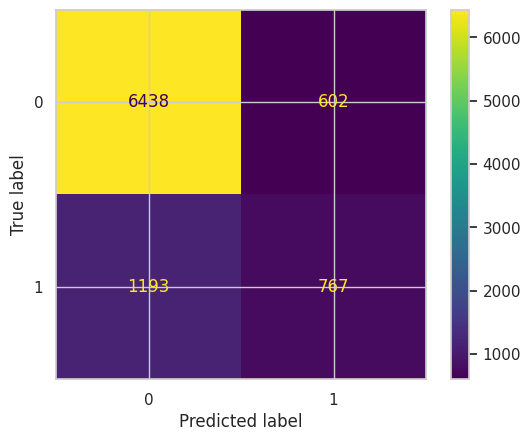

In [ ]:
conf_mat = confusion_matrix(y_test, hyper_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()

#Dummy Classifier

A Dummy Classifier is a type of classifier that uses a simple rule to make predictions, without actually learning from the data. The rule it uses is usually based on the distribution of the target variable in the training data.



In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
y_pred_dummy = dummy_clf.predict(X_test)

print("Dummy model Accuracy:", accuracy_score(y_test, y_pred_dummy))
print(classification_report(y_test,y_pred_dummy ))

Dummy model Accuracy: 0.503
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      7040
           1       0.22      0.50      0.30      1960

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.46      9000
weighted avg       0.66      0.50      0.55      9000



#ROC AUC Curve

The ROC AUC curve is useful because it provides a single score that summarizes the performance of the model across all possible classification thresholds. It is also useful when the dataset is imbalanced, i.e., the number of instances of one class is much higher than the other. In such cases, accuracy may not be an appropriate metric to evaluate the model's performance, and ROC AUC can provide a better assessment.

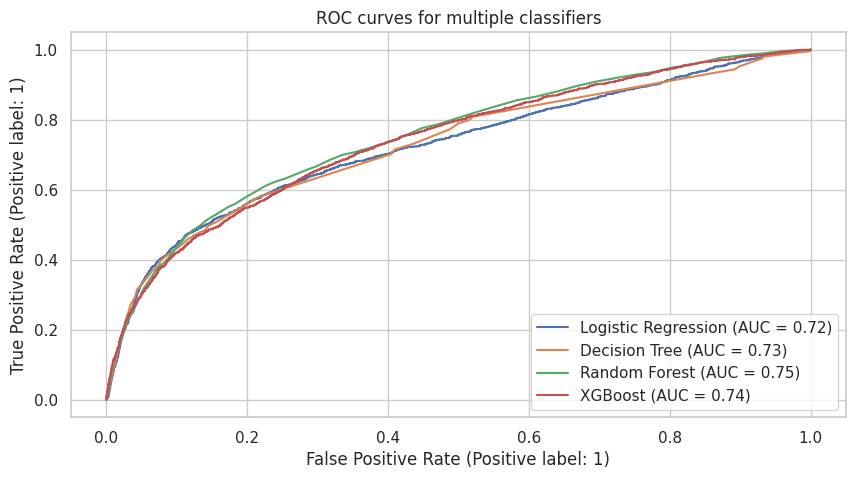

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
roc_display = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=ax, name='Logistic Regression')
roc_display = RocCurveDisplay.from_estimator(Tree, X_test, y_test, ax=ax, name='Decision Tree')
roc_display = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name='Random Forest')
roc_display = RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax, name='XGBoost')
plt.title('ROC curves for multiple classifiers')
plt.show()

The curves show that the Random Forest model has the highest AUC (0.75), followed by the Decision Tree (0.73), XGBoost (0.74) and Logistic Regression (0.72).


A higher AUC value indicates better performance of the model in distinguishing between positive and negative classes. Therefore, we can conclude that the Random Forest model has the best performance among the four models, followed by the Decision Tree and XGBoost models.

# Result Visualisation



In [ ]:
data = {'logistic_regression':68.44,
                'decision_tree':77.72,
               'random_forest': 79.40,
                'xgboost': 80.20,
               'xgboost_hyper':80.05}
courses = list(data.keys())
values = list(data.values())

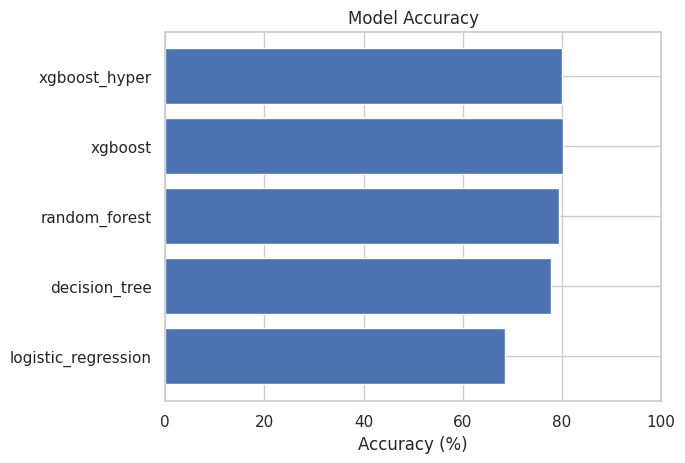

In [ ]:
plt.barh(list(data.keys()), list(data.values()))
plt.xlim(0, 100)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.show()

**Bar plot of accuracies**


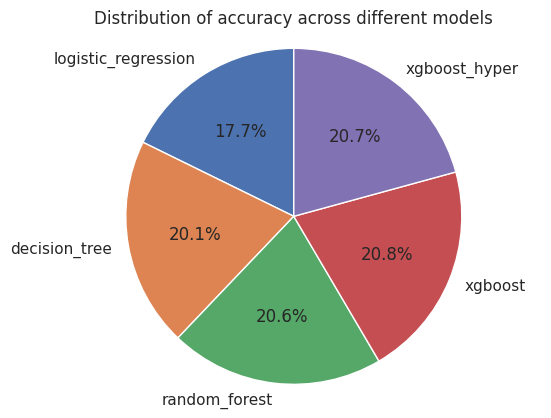

In [ ]:
plt.pie(values, labels=courses, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of accuracy across different models')
plt.show()

**Distribution of accuracy across different models using Piechart**

#Feature Importance

Feature importance helps us understand which features are the most important in determining the target variable in our model. In this case, we are looking at the feature importance of the Random Forest model. The plot shows us the relative importance of each feature in the model, ranked by their importance score. We can use this information to identify which features have the strongest impact on the target variable and potentially use this information to make decisions about which features to focus on in future data collection or analysis.

Text(0.5, 1.0, 'Features importance')

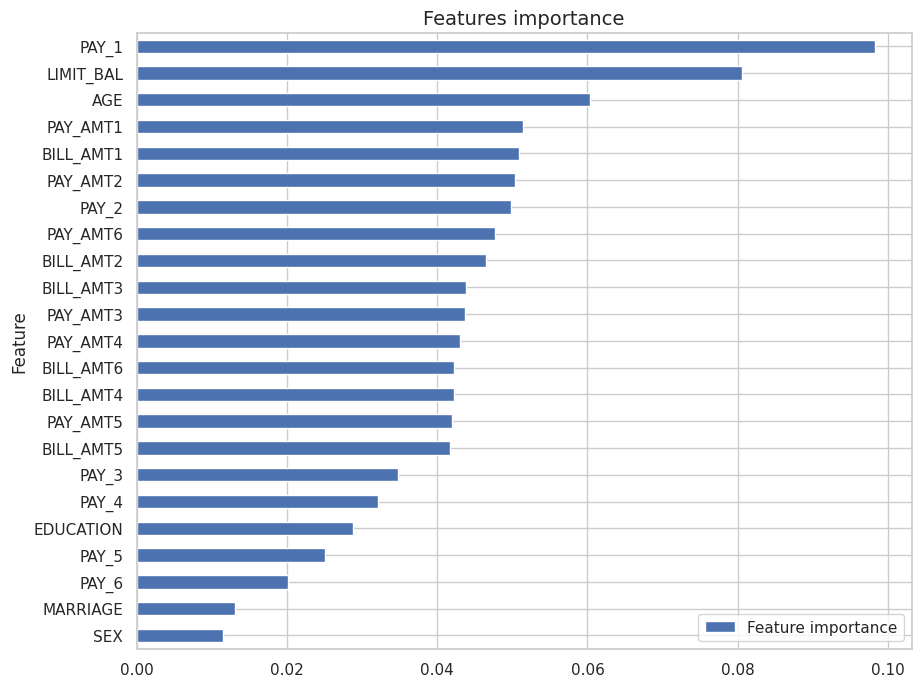

In [ ]:
# Plot feature importance  - Random Forest

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': rf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

In [ ]:
print("********--Logistic Regression--********")
print(classification_report(y_test, pred_logit))
print("********--Random Forest--********")
print(classification_report(y_test, pred_rf))
print("********--Decision Tree--********")
print(classification_report(y_test, pred_tree))
print("********--XGBoost--********")
print(classification_report(y_test,xgboost_pred ))
print("********--XGBoost Tuned--********")
print(classification_report(y_test,hyper_pred ))
print("********--Dummy classifier--********")
print(classification_report(y_test,y_pred_dummy ))

********--Logistic Regression--********
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7040
           1       0.37      0.65      0.47      1960

    accuracy                           0.68      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.77      0.68      0.71      9000

********--Random Forest--********
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7040
           1       0.53      0.47      0.50      1960

    accuracy                           0.79      9000
   macro avg       0.69      0.68      0.69      9000
weighted avg       0.79      0.79      0.79      9000

********--Decision Tree--********
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7040
           1       0.49      0.50      0.49      1960

    accuracy                           0.78      9000
   macro avg       0

#Conclusion

* Logistic regression, random forest, decision tree and XGBoost (both untuned and tuned) are all performing significantly better than the dummy classifier, which simply predicts the majority class.

* Among the models, XGBoost and random forest have the highest accuracy, precision, recall, and F1 scores, indicating that they are the most balanced models with good performance across all metrics.

* The untuned XGBoost model has slightly lower scores than the random forest model, but the tuned XGBoost model has the same scores as the tuned random forest model, indicating that hyperparameter tuning has improved the performance of the XGBoost model.

* Logistic regression and decision tree models have lower scores compared to random forest and XGBoost, but they are still performing better than the dummy classifier.

* The precision of the positive class (1) for all models is relatively low, indicating that they are not as good at predicting the positive class. However, the recall of the positive class is higher for random forest and XGBoost models compared to other models, indicating that they can identify more positive cases.

#Another Examples

#About Dataset

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables 
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.
Feature Selection: Backward elimination (P-value approach)
Logistic regression equation
P=eβ0+β1X1/1+eβ0+β1X1P=eβ0+β1X1/1+eβ0+β1X1
When all features plugged in:
logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucoselogit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

Interpreting the results: Odds Ratio, Confidence Intervals and P-values
• This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females. 
• The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644. 
• Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH. 
• For Total cholesterol level and glucose level there is no significant change.

• There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

Conclusions
• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.88 accuracy. The model is more specific than sensitive. Overall model could be improved with more data

Appendix
http://www.who.int/mediacentre/factsheets/fs317/en/

Data Source References
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/KodandRam/Credit_Card_Default_Prediction/Heart/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [52]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [53]:
df.loc[0]

male                 1.00
age                 39.00
education            4.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            195.00
sysBP              106.00
diaBP               70.00
BMI                 26.97
heartRate           80.00
glucose             77.00
TenYearCHD           0.00
Name: 0, dtype: float64

#Another Example EDA

In [54]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [55]:
# Check column names, columan data type and indentify any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [56]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [57]:
X= df.drop('TenYearCHD',axis=1)
y= df['TenYearCHD']

In [58]:
y.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [59]:
y.isna().sum()

0

In [60]:
X.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [61]:
feature_col=['education','cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']

for col in feature_col:
    X[col].fillna(value= X[col].mean(), inplace=True)

In [62]:
X.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

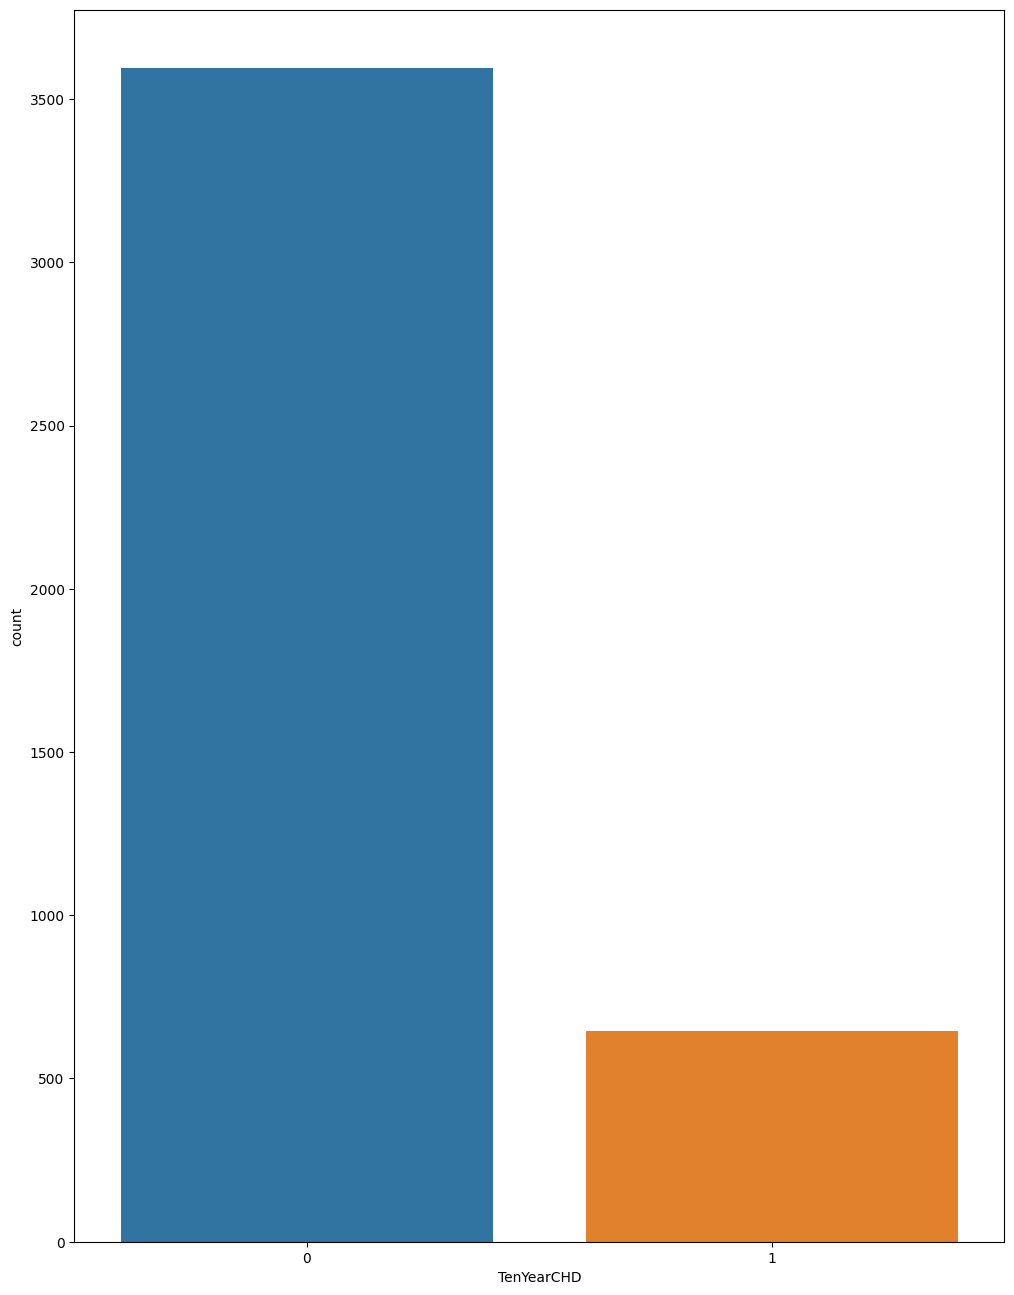

In [103]:
# Check the distribution of the target variable
sns.countplot(x='TenYearCHD', data=df)

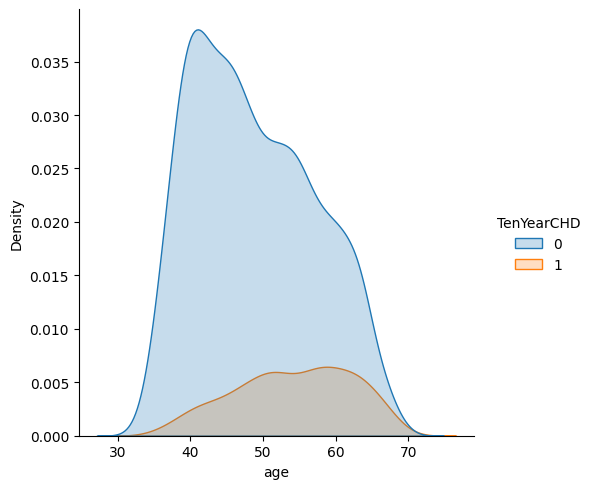

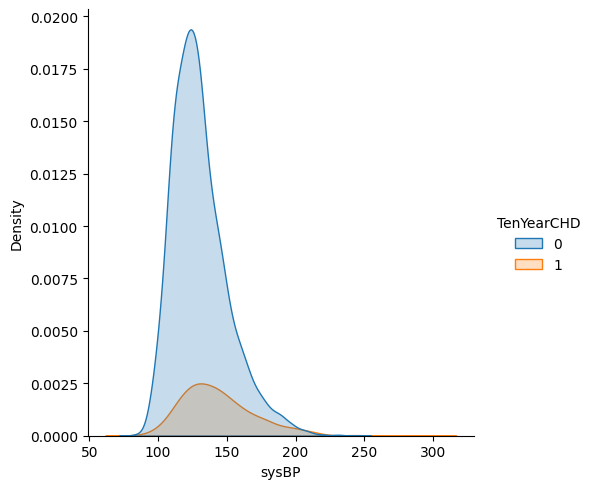

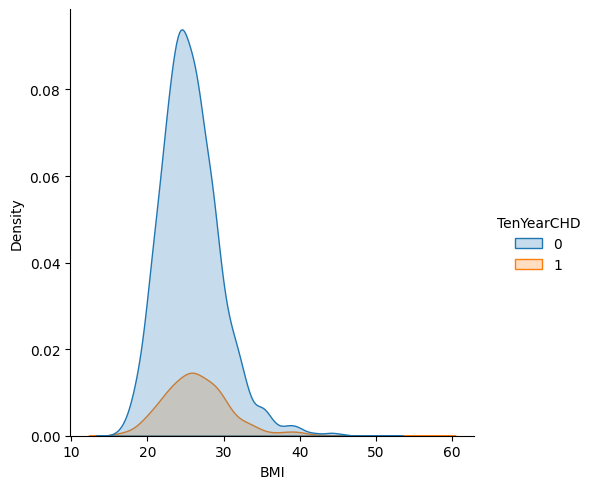

In [104]:
# Check the distribution of the numerical features
sns.displot(df, x='age', hue='TenYearCHD', kind='kde', fill=True)
sns.displot(df, x='sysBP', hue='TenYearCHD', kind='kde', fill=True)
sns.displot(df, x='BMI', hue='TenYearCHD', kind='kde', fill=True)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

#Splitting Data

In [64]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2, random_state=42)

#SMOTE for Imbalance

In [65]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_resample,y_resample= smote.fit_resample(X_train,y_train)

#Logistic Regression

In [66]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

pred_logit= logit.predict(X_test)

print("Logit model's accuracy:", accuracy_score(y_test, pred_logit))

print(classification_report(y_test, pred_logit))



Logit model's accuracy: 0.8573113207547169
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



#Decision Tree

In [67]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
print('Decision Tree Accuracy :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))


Decision Tree Accuracy : 0.8325471698113207
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       724
           1       0.28      0.09      0.13       124

    accuracy                           0.83       848
   macro avg       0.57      0.52      0.52       848
weighted avg       0.77      0.83      0.79       848



#Random Forest

In [68]:
rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))

Random Forest Accuracy is: 0.8525943396226415
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.47      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848



#XGBoost

In [69]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))

XGBoost Accuracy: 0.8254716981132075
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       724
           1       0.29      0.14      0.19       124

    accuracy                           0.83       848
   macro avg       0.58      0.54      0.54       848
weighted avg       0.78      0.83      0.80       848



In [70]:
# Instantiate models with initial best guess parameters

params = { 
    'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}

In [71]:
# Instantiate model
clf_xgb = XGBClassifier(**params)

In [72]:
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)


In [73]:
print(np.mean(scores))

0.7055112570356472


#Parameter Tuning

In [74]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }

In [75]:
random_search=RandomizedSearchCV(xgboost,
                                 param_distributions=random_grid_xgb,
                                 n_iter=5,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': array([200, 400, 600, 800]),
                                        'scale_pos_weight': [1, 3.5],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   scoring='roc_auc', verbose=3)

In [76]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
#  best param
random_search.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 1,
 'n_estimators': 600,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [78]:
classifier=XGBClassifier(objective='binary:logistic',
                                  subsample=0.4,
                                 max_depth=3,
                                 learning_rate=0.2,
                                 gamma=0.3,
                                  n_estimators=500,
                                  scale_pos_weight=1,
                                  colsample_bytree=0.6,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
hyper_pred= classifier.predict(X_test)

print("The accuracy of the model is:", accuracy_score(y_test, hyper_pred))

The accuracy of the model is: 0.8195754716981132


#Confusion Matrix for above Models

##Logistic Regression

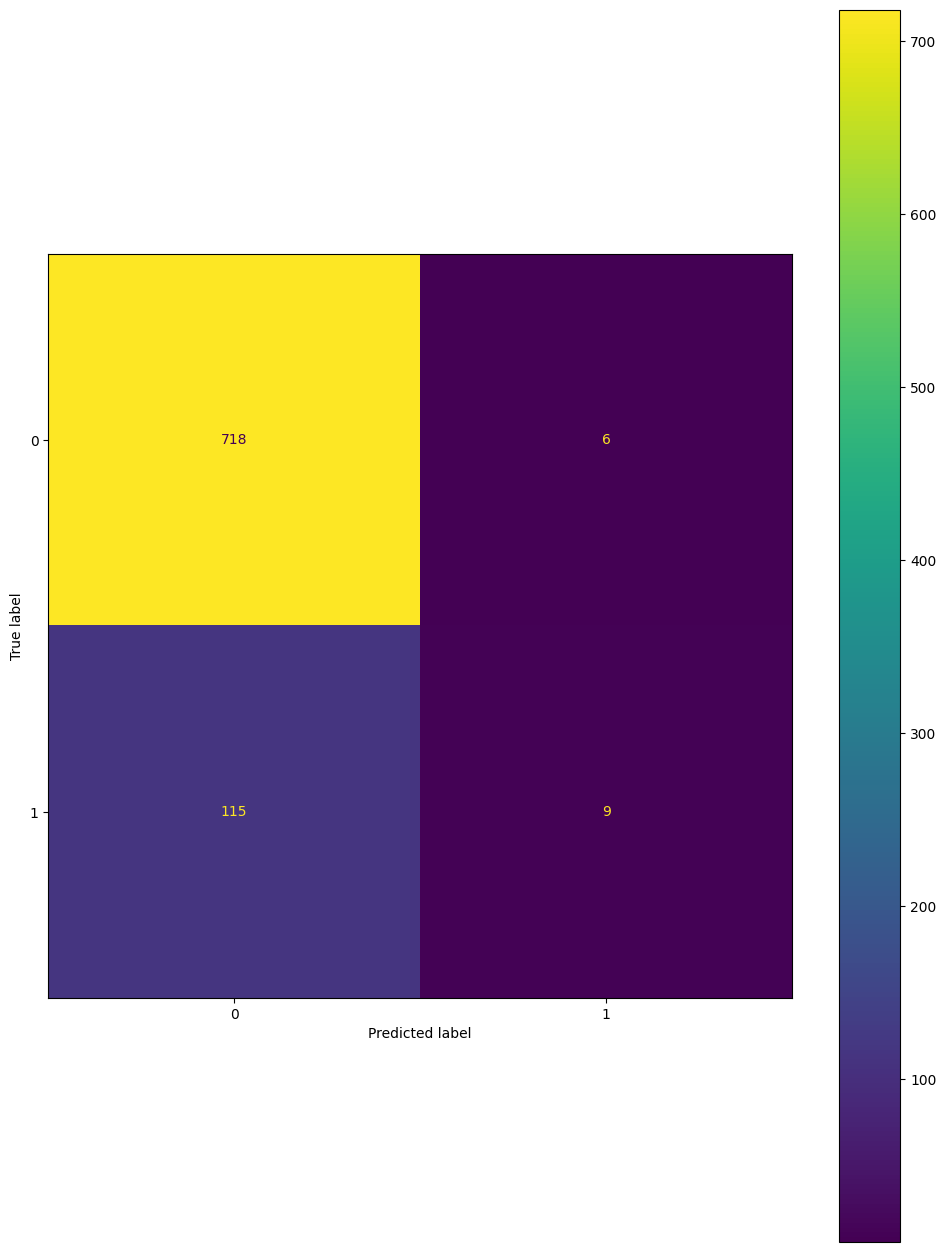

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, pred_logit)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


##Decision Tree

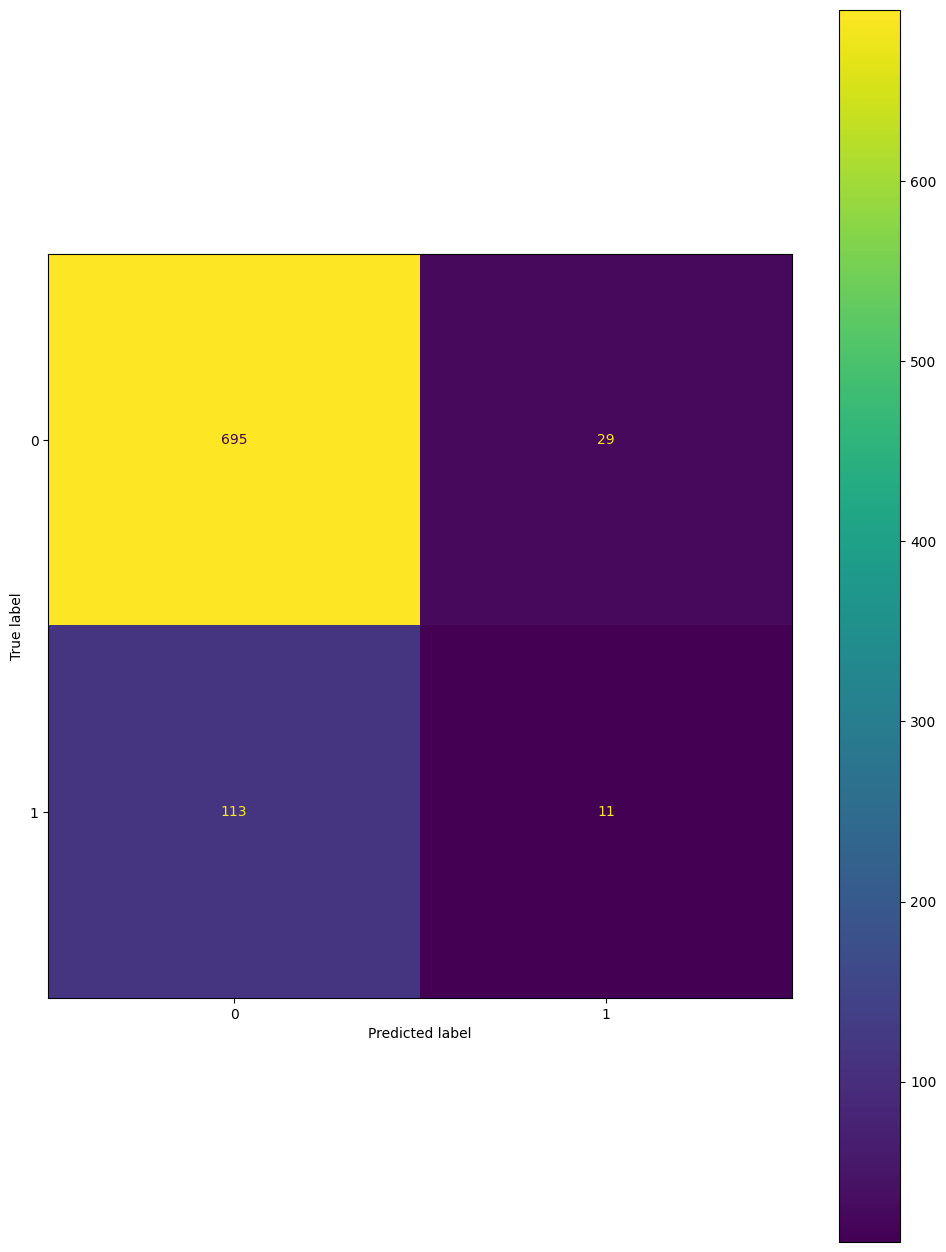

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


##Random Forest

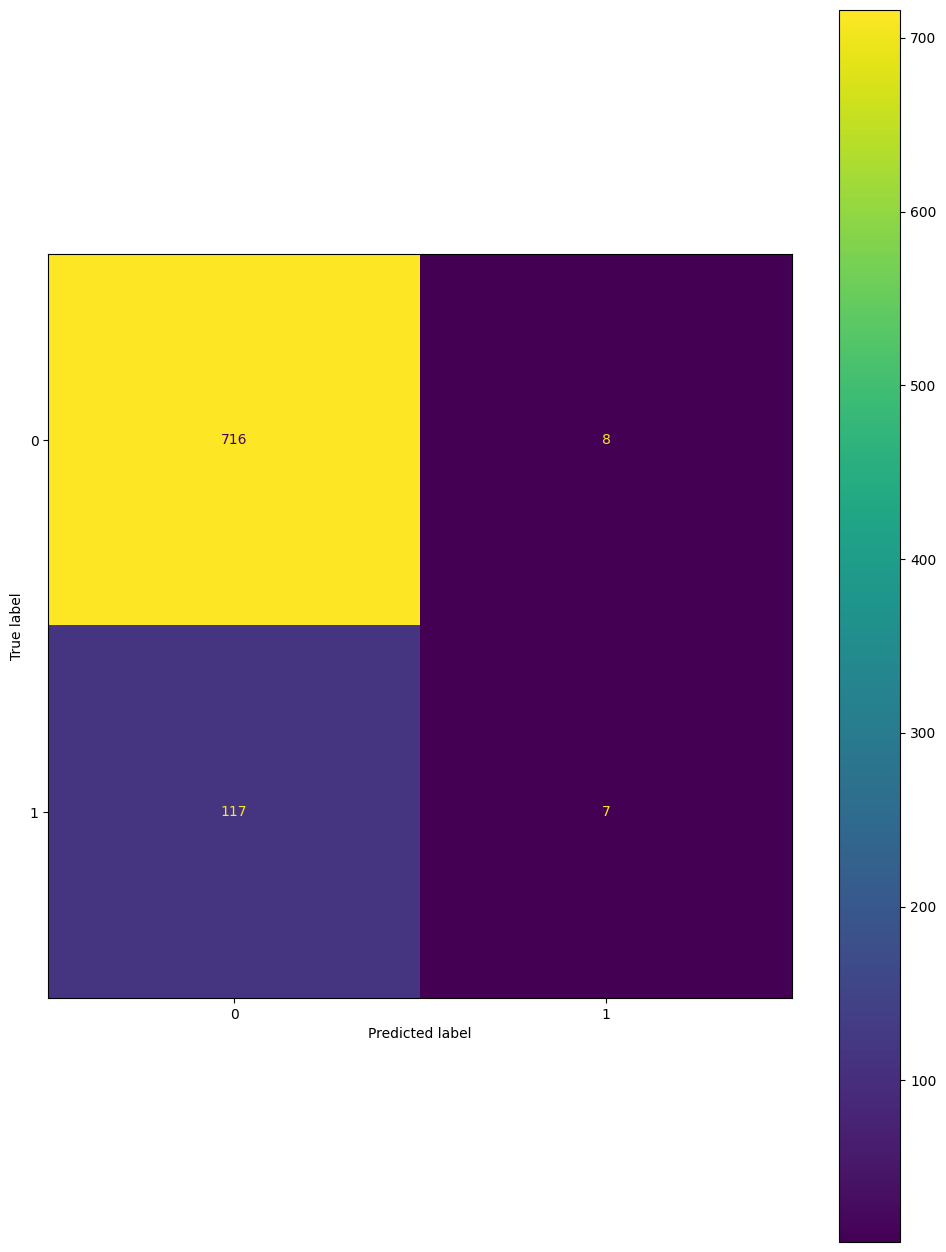

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


##XGBoost

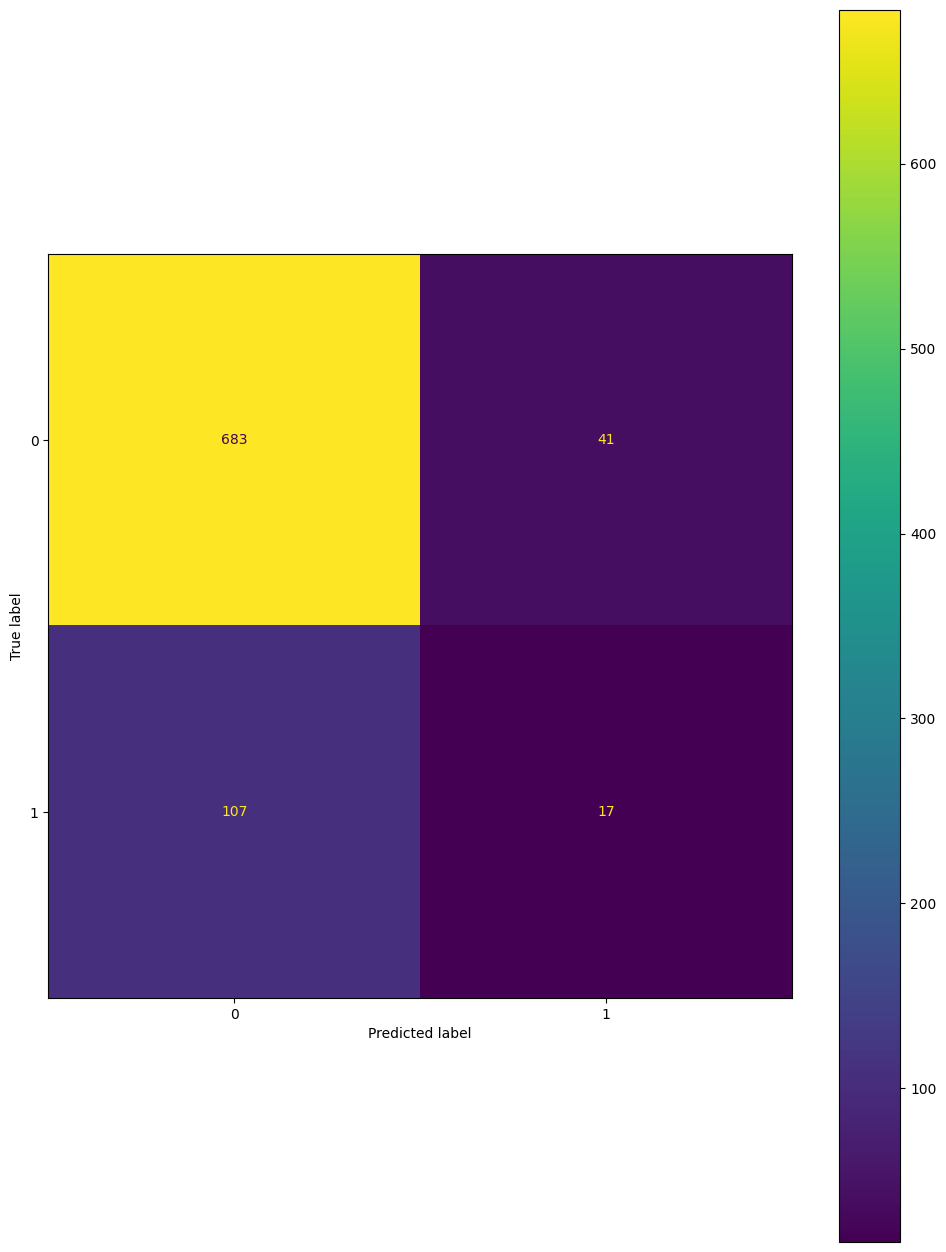

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, xgboost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


##Tuned XGBoost

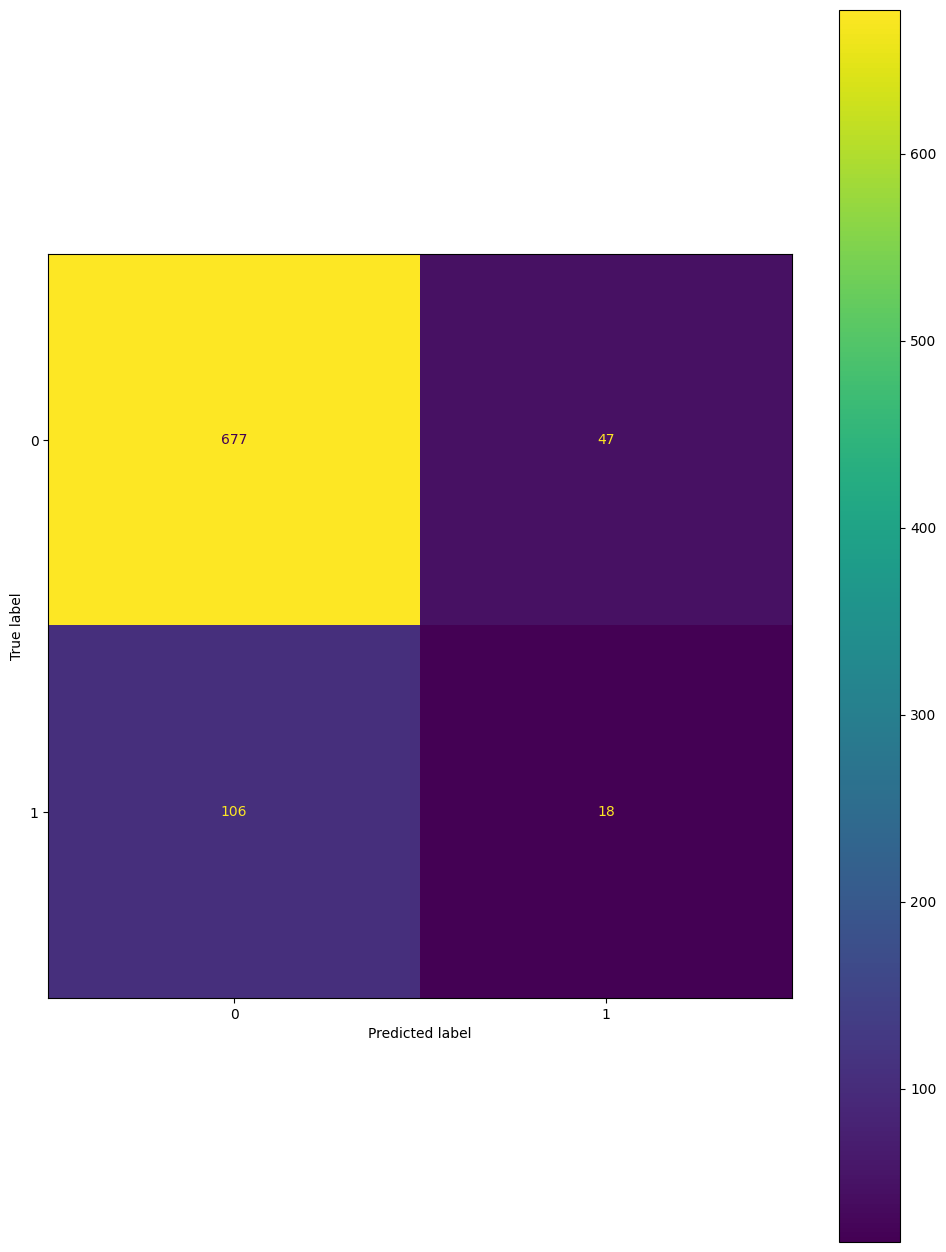

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, hyper_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=logit.classes_)
disp.plot()


#ROC AUC Curve

In [87]:
from sklearn.metrics import  RocCurveDisplay

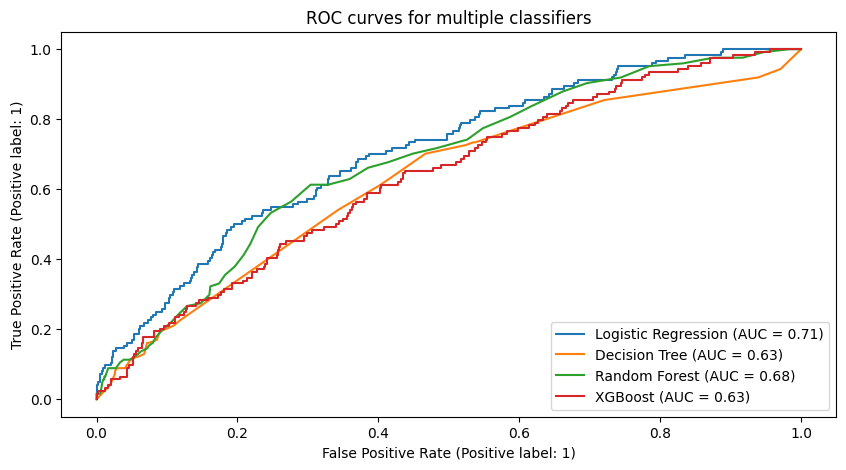

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
roc_display = RocCurveDisplay.from_estimator(logit, X_test, y_test, ax=ax, name='Logistic Regression')
roc_display = RocCurveDisplay.from_estimator(Tree, X_test, y_test, ax=ax, name='Decision Tree')
roc_display = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, name='Random Forest')
roc_display = RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax, name='XGBoost')
plt.title('ROC curves for multiple classifiers')
plt.show()

The AUC is a metric that indicates how well a model can distinguish between positive and negative samples. A perfect model would have an AUC of 1, while a random guess would have an AUC of 0.5. Therefore, the higher the AUC, the better the model's performance. In this case, the logistic regression model has the highest AUC, followed by the random forest model, while the decision tree and XGBoost models have lower AUC values. However, it is important to note that the choice of the best model depends on the specific problem and the trade-offs between different metrics such as precision, recall, and accuracy.

Result Visualisation

In [90]:
data = {'logistic_regression':86.00,
                'decision_tree':83.00,
               'random_forest': 85.00,
                'xgboost': 83.00,
               'xgboost_hyper':82.00}
courses = list(data.keys())
values = list(data.values())

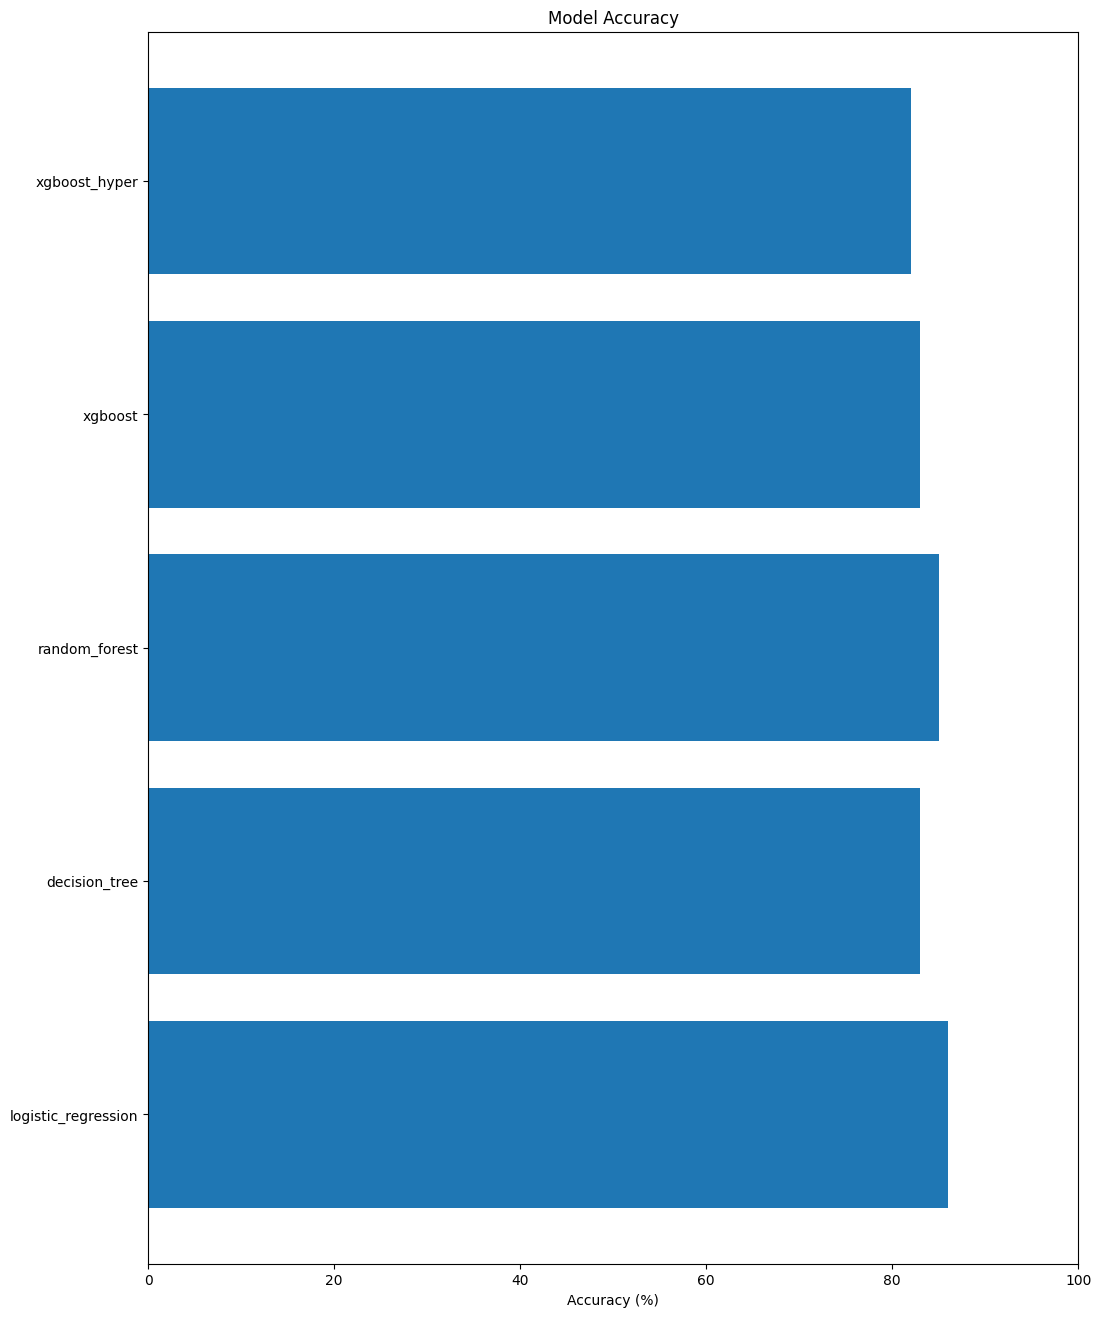

In [91]:
plt.barh(list(data.keys()), list(data.values()))
plt.xlim(0, 100)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.show()

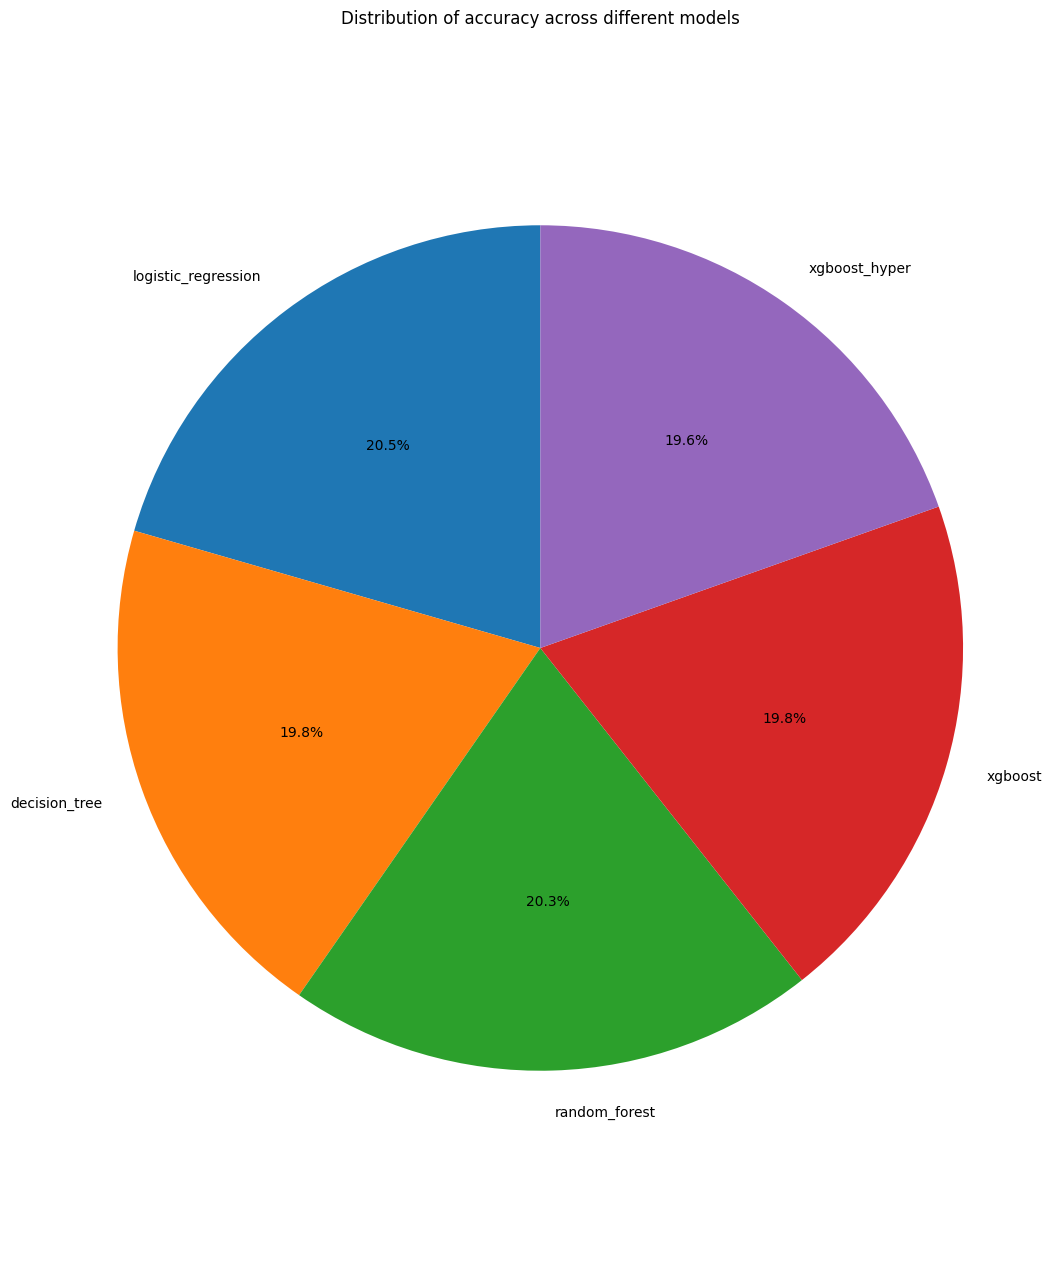

In [92]:
plt.pie(values, labels=courses, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of accuracy across different models')
plt.show()

#Feature Importance

Feature importance helps us understand which features are the most important in determining the target variable in our model. In this case, we are looking at the feature importance of the Random Forest model. The plot shows us the relative importance of each feature in the model, ranked by their importance score. We can use this information to identify which features have the strongest impact on the target variable and potentially use this information to make decisions about which features to focus on in future data collection or analysis.

Text(0.5, 1.0, 'Features importance')

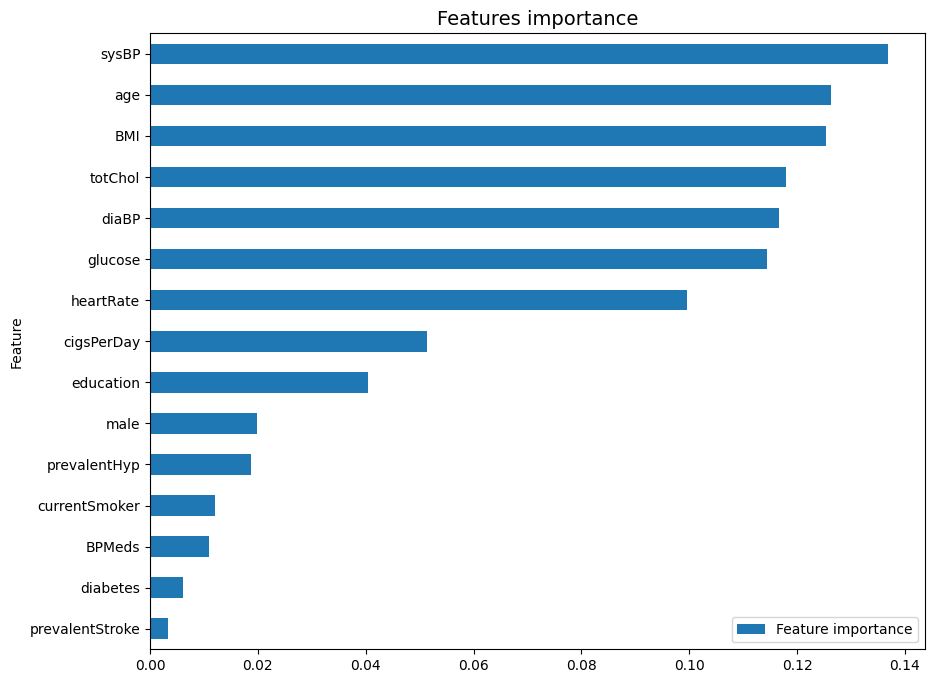

In [102]:
# Plot feature importance  - Random Forest

fea_df = pd.DataFrame({'Feature': X.columns, 'Feature importance': rf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

In [89]:
print("********--Logistic Regression--********")
print(classification_report(y_test, pred_logit))
print("********--Random Forest--********")
print(classification_report(y_test, pred_rf))
print("********--Decision Tree--********")
print(classification_report(y_test, pred_tree))
print("********--XGBoost--********")
print(classification_report(y_test,xgboost_pred ))
print("********--XGBoost Tuned--********")
print(classification_report(y_test,hyper_pred ))


********--Logistic Regression--********
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

********--Random Forest--********
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.47      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848

********--Decision Tree--********
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       724
           1       0.28      0.09      0.13       124

    accuracy                           0.83       848
   macro avg       0

#Conclusion

Based on the results from the different models applied to the heart disease prediction dataset, it appears that logistic regression and random forest performed the best, with an accuracy of 0.86 and 0.85, respectively. However, both models struggled with predicting positive cases (class 1) with low recall and f1-score values. The decision tree and XGBoost models had lower accuracy values, but the XGBoost model had slightly higher recall and f1-score values for positive cases than the decision tree model.

The XGBoost model was also tuned, but the tuning did not improve its performance significantly.

Overall, these results suggest that the heart disease prediction task may be challenging, and there may be room for improvement in the modeling approach.

#References

* Scikit-learn: https://scikit-learn.org/stable/documentation.html
* Pandas: https://pandas.pydata.org/docs/
* Numpy: https://numpy.org/doc/
* Matplotlib: https://matplotlib.org/stable/contents.html
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron
* Python Machine Learning by Sebastian Raschka and Vahid Mirjalili
* https://www.kaggle.com/code/ankumagawa/credit-card-default-prediction-step-by-step
* Scikit-learn documentation: https://scikit-learn.org/stable/index.html
* UCI Credit Card Dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients